-----------------------------------------

## **3. Cluster Exploration**

-----------------------------------------

### Table of Contents

* [1.1 Importing the Datasets and Libraries](#1.1)
* [1.2 Preliminary Data Analysis and Arrangements](#1.2)
* [1.3 Exploring Data Distributions](#1.3)
* [1.4 Treating Inconsistencies](#1.4)
* [1.5 Feature Engeneering](#1.5)
* [1.6 Data Visualization](#1.6)
* [1.7 Exporting the Datasets](#1.7)

-----------------------------------------

<a id="3.1"></a>
    
## <font color='#FFFFF'>3.1. Importing the datasets and libraries <font>

This section, as mentioned in the title, is intended for importing the data and necessary libraries.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import folium
import seaborn as sns

In [16]:
%load_ext autoreload
%autoreload 2
from Visualizations import *
from Functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Big Families Cluster
big_families = pd.read_csv('/content/Big Families.csv')

# Big Spenders Cluster
big_spenders = pd.read_csv('/content/Big Spenders.csv')

# Drunkards Cluster
drunkards = pd.read_csv('/content/Drunkards.csv')

# Fishy Pals Cluster
fishy_pals = pd.read_csv('/content/Fishy Pals.csv')

# Gamer Community Cluster
gamer_community = pd.read_csv('/content/Gamer Community.csv')

# Pet Lovers Cluster
pet_lovers = pd.read_csv('/content/Pet Lovers.csv')

# Savings Squad Cluster
savings_squad = pd.read_csv('/content/Savings Squad.csv')

# Veggie Society Cluster
veggies_society = pd.read_csv('/content/Veggies Society.csv')

# Dataset containing all the customers and their corresponding cluster
customers_with_clusters = pd.read_csv('/content/Customers_with_Clusters.csv')

Since <b>Fishy Pals</b> was a cluster obtained differently from the others during the data preprocessing phase (previously named <b>fishy_customers</b>), it does not contain the columns <u>cluster</u> or <u>robust_ward_7</u>. Therefore, these columns will need to be manually imputed.

In [7]:
fishy_pals['cluster'] = 'Fishy Pals'
fishy_pals['robust_ward_7'] = None

In [8]:
# Append the Fishy Pals cluster to the customers_with_clusters dataset
customers_with_clusters_ = pd.concat([customers_with_clusters, fishy_pals], ignore_index = True)

The pie chart below is intended solely for visualizing the color representation of each cluster based on UMAP, with no specific numerical values assigned to its segments.

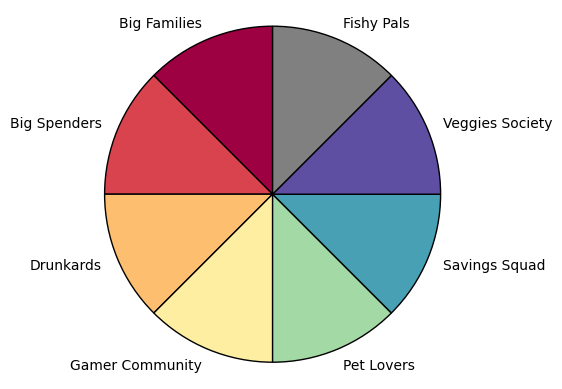

In [9]:
cluster_colors_pie_chart(['#9e0142', '#d8434e', '#fdbf6f', '#feeea2', '#a2d9a4', '#47a0b3', '#5e4fa2', 'grey'], ['Big Families', 'Big Spenders', 'Drunkards', 'Gamer Community', 'Pet Lovers', 'Savings Squad', 'Veggies Society', 'Fishy Pals'])

Below, we will analyze the location of each cluster.
<br>
It's important to note that this is based on the average coordinates of each cluster, so there may be some customers within a cluster whose locations vary slightly.

In [10]:
cluster_average_coords = customers_with_clusters_.groupby('cluster').agg({'latitude':'mean', 'longitude':'mean'}).reset_index()

map_clusters = folium.Map(location=[38.7223, -9.1393], zoom_start = 13)

for _, row in cluster_average_coords.iterrows():
    cluster_coordinates = [row['latitude'], row['longitude']]
    cluster = row['cluster']
    color = create_cluster_colors_dictionary(['#9e0142', '#d8434e', '#fdbf6f', '#feeea2', '#a2d9a4', '#47a0b3', '#5e4fa2', 'grey'], ['Big Families', 'Big Spenders', 'Drunkards', 'Gamer Community', 'Pet Lovers', 'Savings Squad', 'Veggies Society', 'Fishy Pals']).get(cluster)
    marker = folium.CircleMarker(location = cluster_coordinates, color = 'black', fill = True, fill_color = color, fill_opacity = 1.0, radius = 15)
    marker.add_to(map_clusters)

map_clusters

<b>Fishy Pals</b> are located between Ericeira and Peniche. <b>Pet lovers</b>, in green, are situated in Jardim das Laranjeiras, close to a park and a veterinary office. The <b>Savings Squad</b>, in blue, resides in Avenidas das Forças Armadas. The <b>Veggies Society</b>, in purple, is located in Campo Grande near Cidade Universitária. The <b>Big Families</b>, in bordeaux, are also in Campo Grande, as well as the <b>Big Spenders</b>, in red. The <b>Drunkards</b> in orange live near NOVA IMS, likely correlating with their probable study location 😏. The <b>Gamer Community</b>, in yellow, resides close to Alvalade.

Subsequently, our decision was to generate multiple histograms, each corresponding to a distinct continuous variable. Within each histogram, the distribution for every cluster is represented.

In [11]:
cluster_histograms(customers_with_clusters_, ['number_complaints', 'distinct_stores_visited', 'spend_groceries', 'spend_electronics', 'typical_hour', 'spend_vegetables', 'spend_nonalcohol_drinks', 'spend_alcohol_drinks', 'spend_meat', 'spend_fish',
                      'spend_hygiene', 'spend_videogames', 'spend_petfood', 'total_distinct_products', 'year_first_transaction', 'latitude', 'longitude', 'treated_percentage_of_products_bought_promotion', 'Children', 'Age'],
                   create_cluster_colors_dictionary(['#9e0142', '#d8434e', '#fdbf6f', '#feeea2', '#a2d9a4', '#47a0b3', '#5e4fa2', 'grey'], ['Big Families', 'Big Spenders', 'Drunkards', 'Gamer Community', 'Pet Lovers', 'Savings Squad', 'Veggies Society', 'Fishy Pals']))

Output hidden; open in https://colab.research.google.com to view.

* Histogram of number_complaints: The <b>Savings Squad</b> exhibits the highest number of complaints, requiring further analysis.
* Histogram of distinct_stores_visited: The <b>Savings Squad</b> visits the most distinct stores.
* Histogram of spend_groceries: <b>Pet Lovers</b> and <b>Gamer Community</b> are the top spenders.
* Histogram of spend_electronics: <b>Gamer Community</b> leads in spending on electronics.
* Histogram of typical_hour: <b>Big Spenders</b> shop earlier, while <b>Big Families</b> shop later.
* Histogram of spend_vegetables: The <b>Veggies Society</b> shows the highest spending.
* Histogram of spend_nonalcohol_drinks: The clusters display a similar distribution.
* Histogram of spend_alcohol_drinks: The <b>Drunkards</b> and <b>Gamer Community</b> top the spending.
* Histogram of spend_meat: <b>Gamer Community</b> leads in spending.
* Histogram of spend_fish: <b>Fishy Pals</b> significantly outspend other clusters.
* Histogram of spend_hygiene: <b>Big Spenders</b> and <b>Gamer Community</b> are the highest spenders.
* Histogram of spend_videogames: <b>Gamer Community</b> spends the most, while <b>Pet Lovers</b> don't spend anything.
* Histogram of spend_petfood: <b>Pet Lovers</b> are the top spenders.
* Histogram of total_distinct_products: <b>Big Spenders</b> lead in spending on distinct products.
* Histogram of year_first_transaction: Similar distribution for most clusters, but <b>Drunkards</b> are more recent in their transactions.
* Histogram of latitude: <b>Fishy Pals</b> stand out from other clusters.
* Histogram of longitude: <b>Fishy Pals</b> are distinct in location.
* Histogram of treated_percentage_of_products_bought_promotion: The <b>Savings Squad</b> spends the most.
* Histogram of Children: <b>Big Families</b> have the most children by a significant margin.
* Histogram of Age: <b>Drunkards</b> are the youngest, while other clusters have a similar distribution.

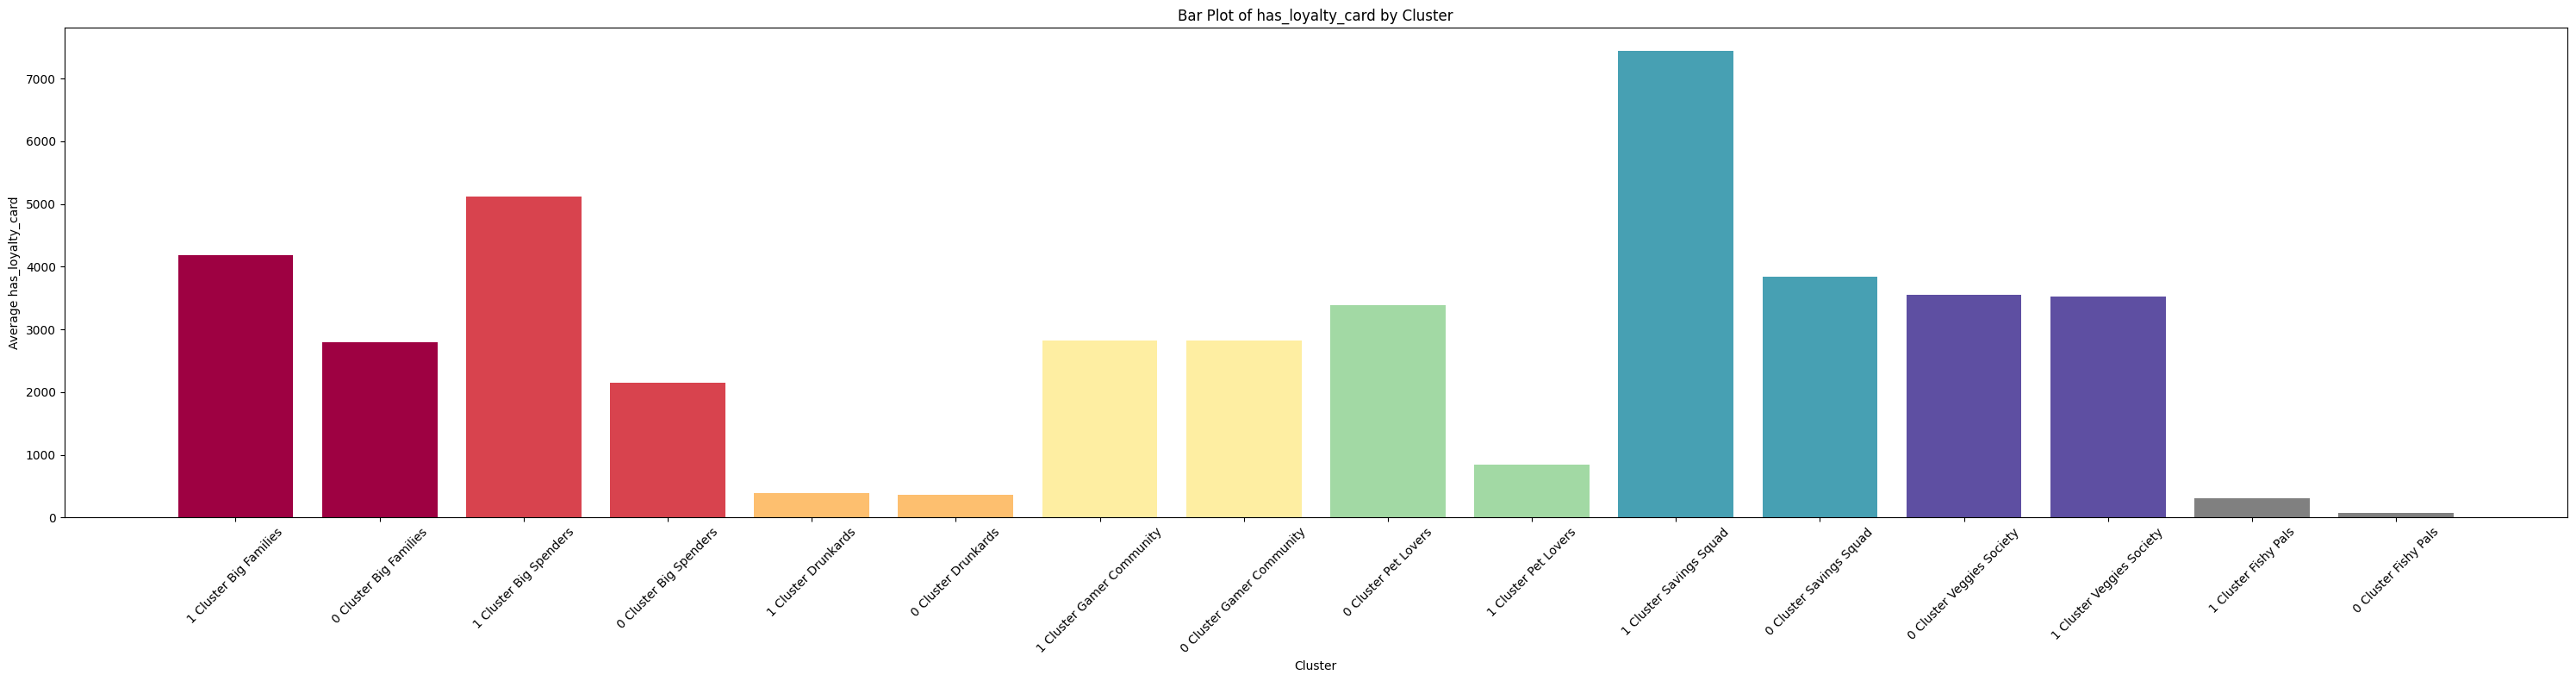

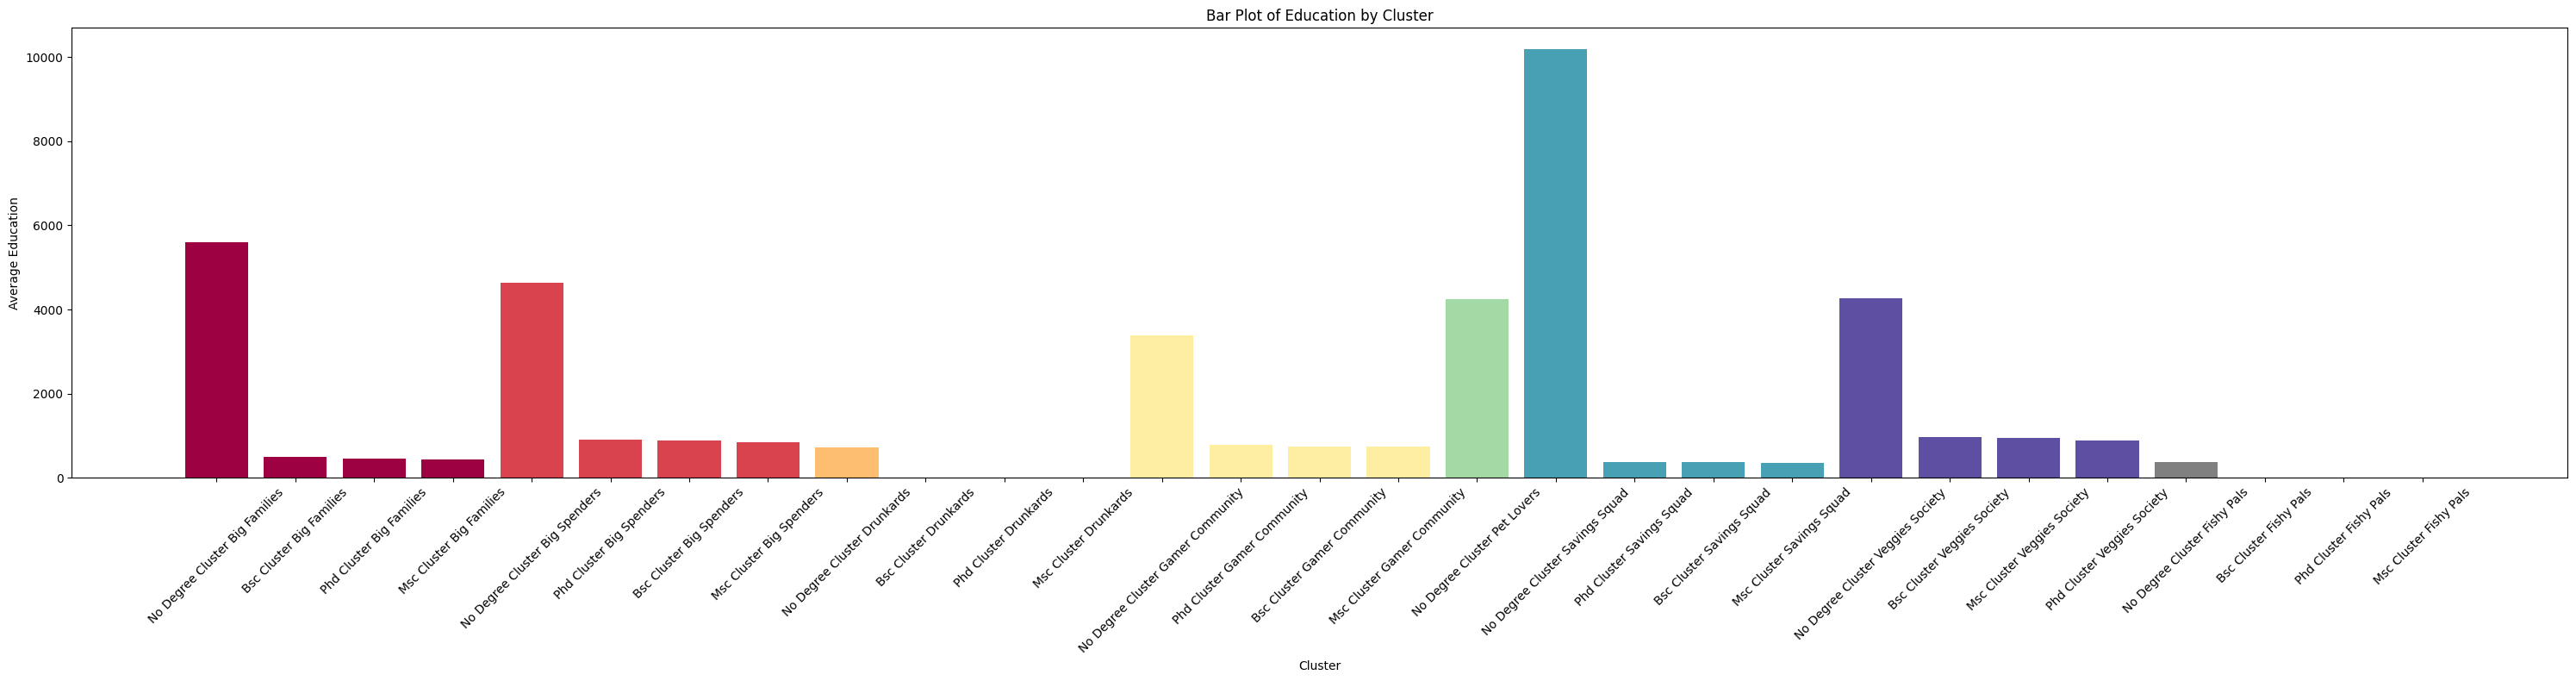

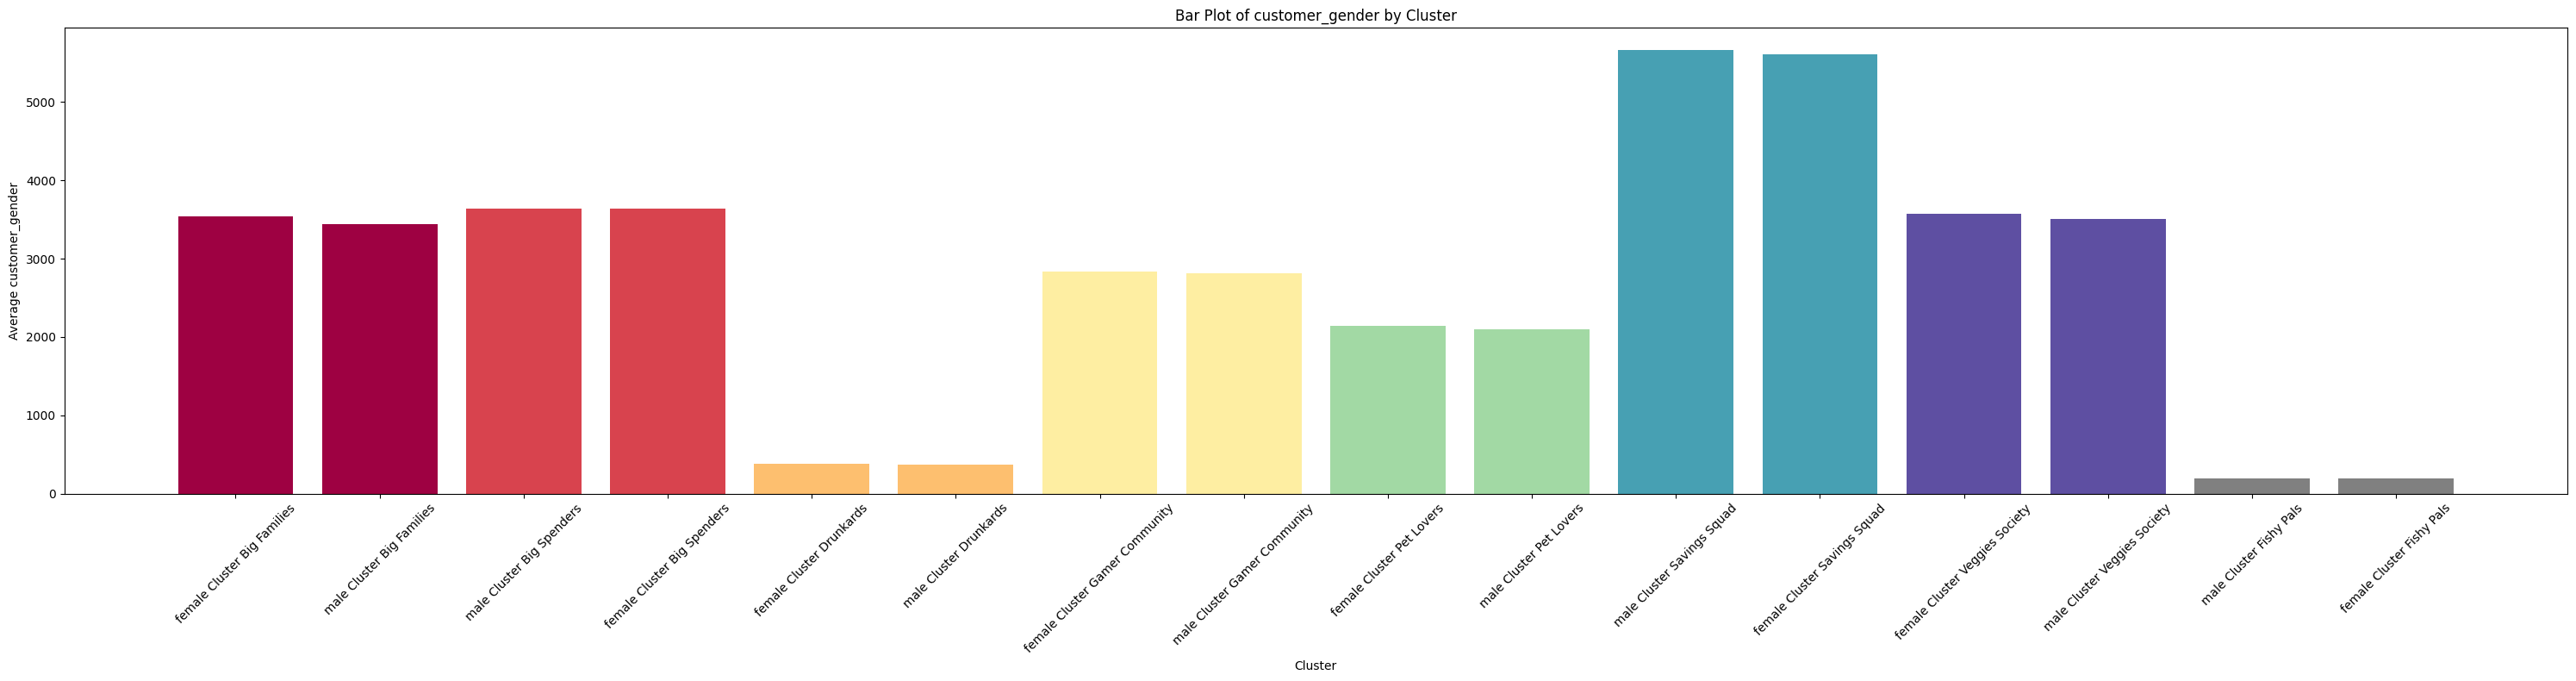

In [12]:
cluster_barplots(customers_with_clusters_, ['has_loyalty_card', 'Education', 'customer_gender'], create_cluster_colors_dictionary(['#9e0142', '#d8434e', '#fdbf6f', '#feeea2', '#a2d9a4', '#47a0b3', '#5e4fa2', 'grey'], ['Big Families', 'Big Spenders', 'Drunkards', 'Gamer Community', 'Pet Lovers', 'Savings Squad', 'Veggies Society', 'Fishy Pals']))

* Bar Plot of has_loyalty_card: <b>Gamer Community</b>, <b>Drunkards</b> and <b>Veggies Society</b> show an even distribution of customers with and without loyalty cards. Other clusters have more customers with loyalty cards than without.
* Bar Plot of Education: The majority of customers across clusters have no degree. <b>Pet Lovers</b> cluster consists of customers with a masters' degree as teh only level of education.
* Bar Plot og customer_gender: In most clusters, there is an equal split between male and female customers. Female customers slightly outnumber male customers in the <b>Big Families</b>, <b>Pet Lovers</b> and <b>Savings Squad</b> clusters.

It was intriguing for us to analyze the customers who have four or more complaints.

In [13]:
high_number_of_complaints = customers_with_clusters_[customers_with_clusters_['number_complaints'] >= 4]

karens = high_number_of_complaints[['number_complaints', 'cluster']]

In [14]:
karen_counts = karens['cluster'].value_counts()
karen_counts

cluster
Savings Squad    126
Name: count, dtype: int64

We observed that there are only 126 customers, referred to as <b>Karens</b> due to their more than 3 complaints, all of whom are situated within the <b>Savings Squad</b> cluster.

Consequently, we will generate a plot illustrating the number of customers in each cluster, incorporating the count of 'Karens' within the 'Savings Squad' cluster.

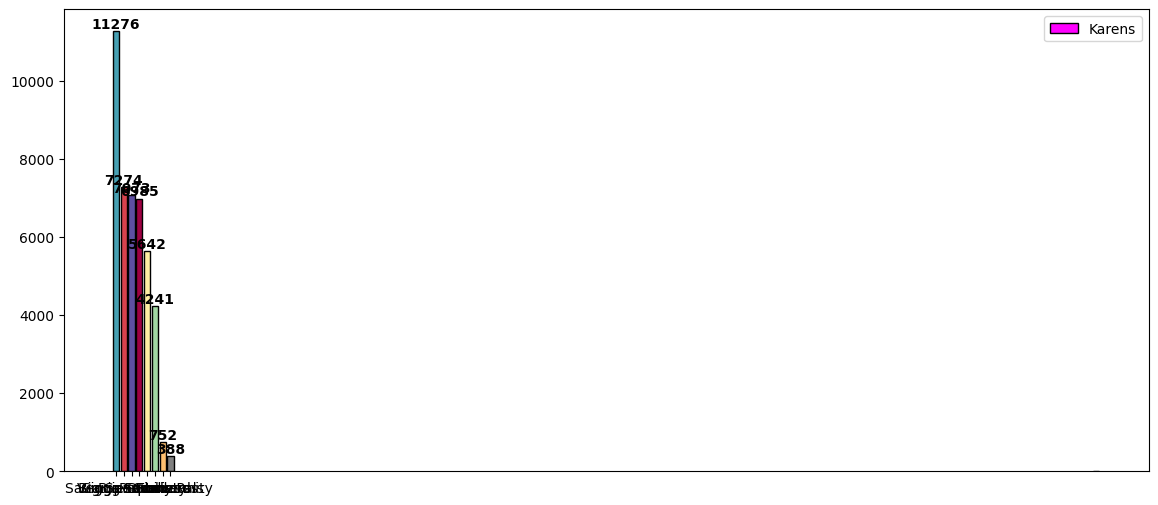

In [17]:
cluster_sizes(customers_with_clusters_, karen_counts)

Outliers

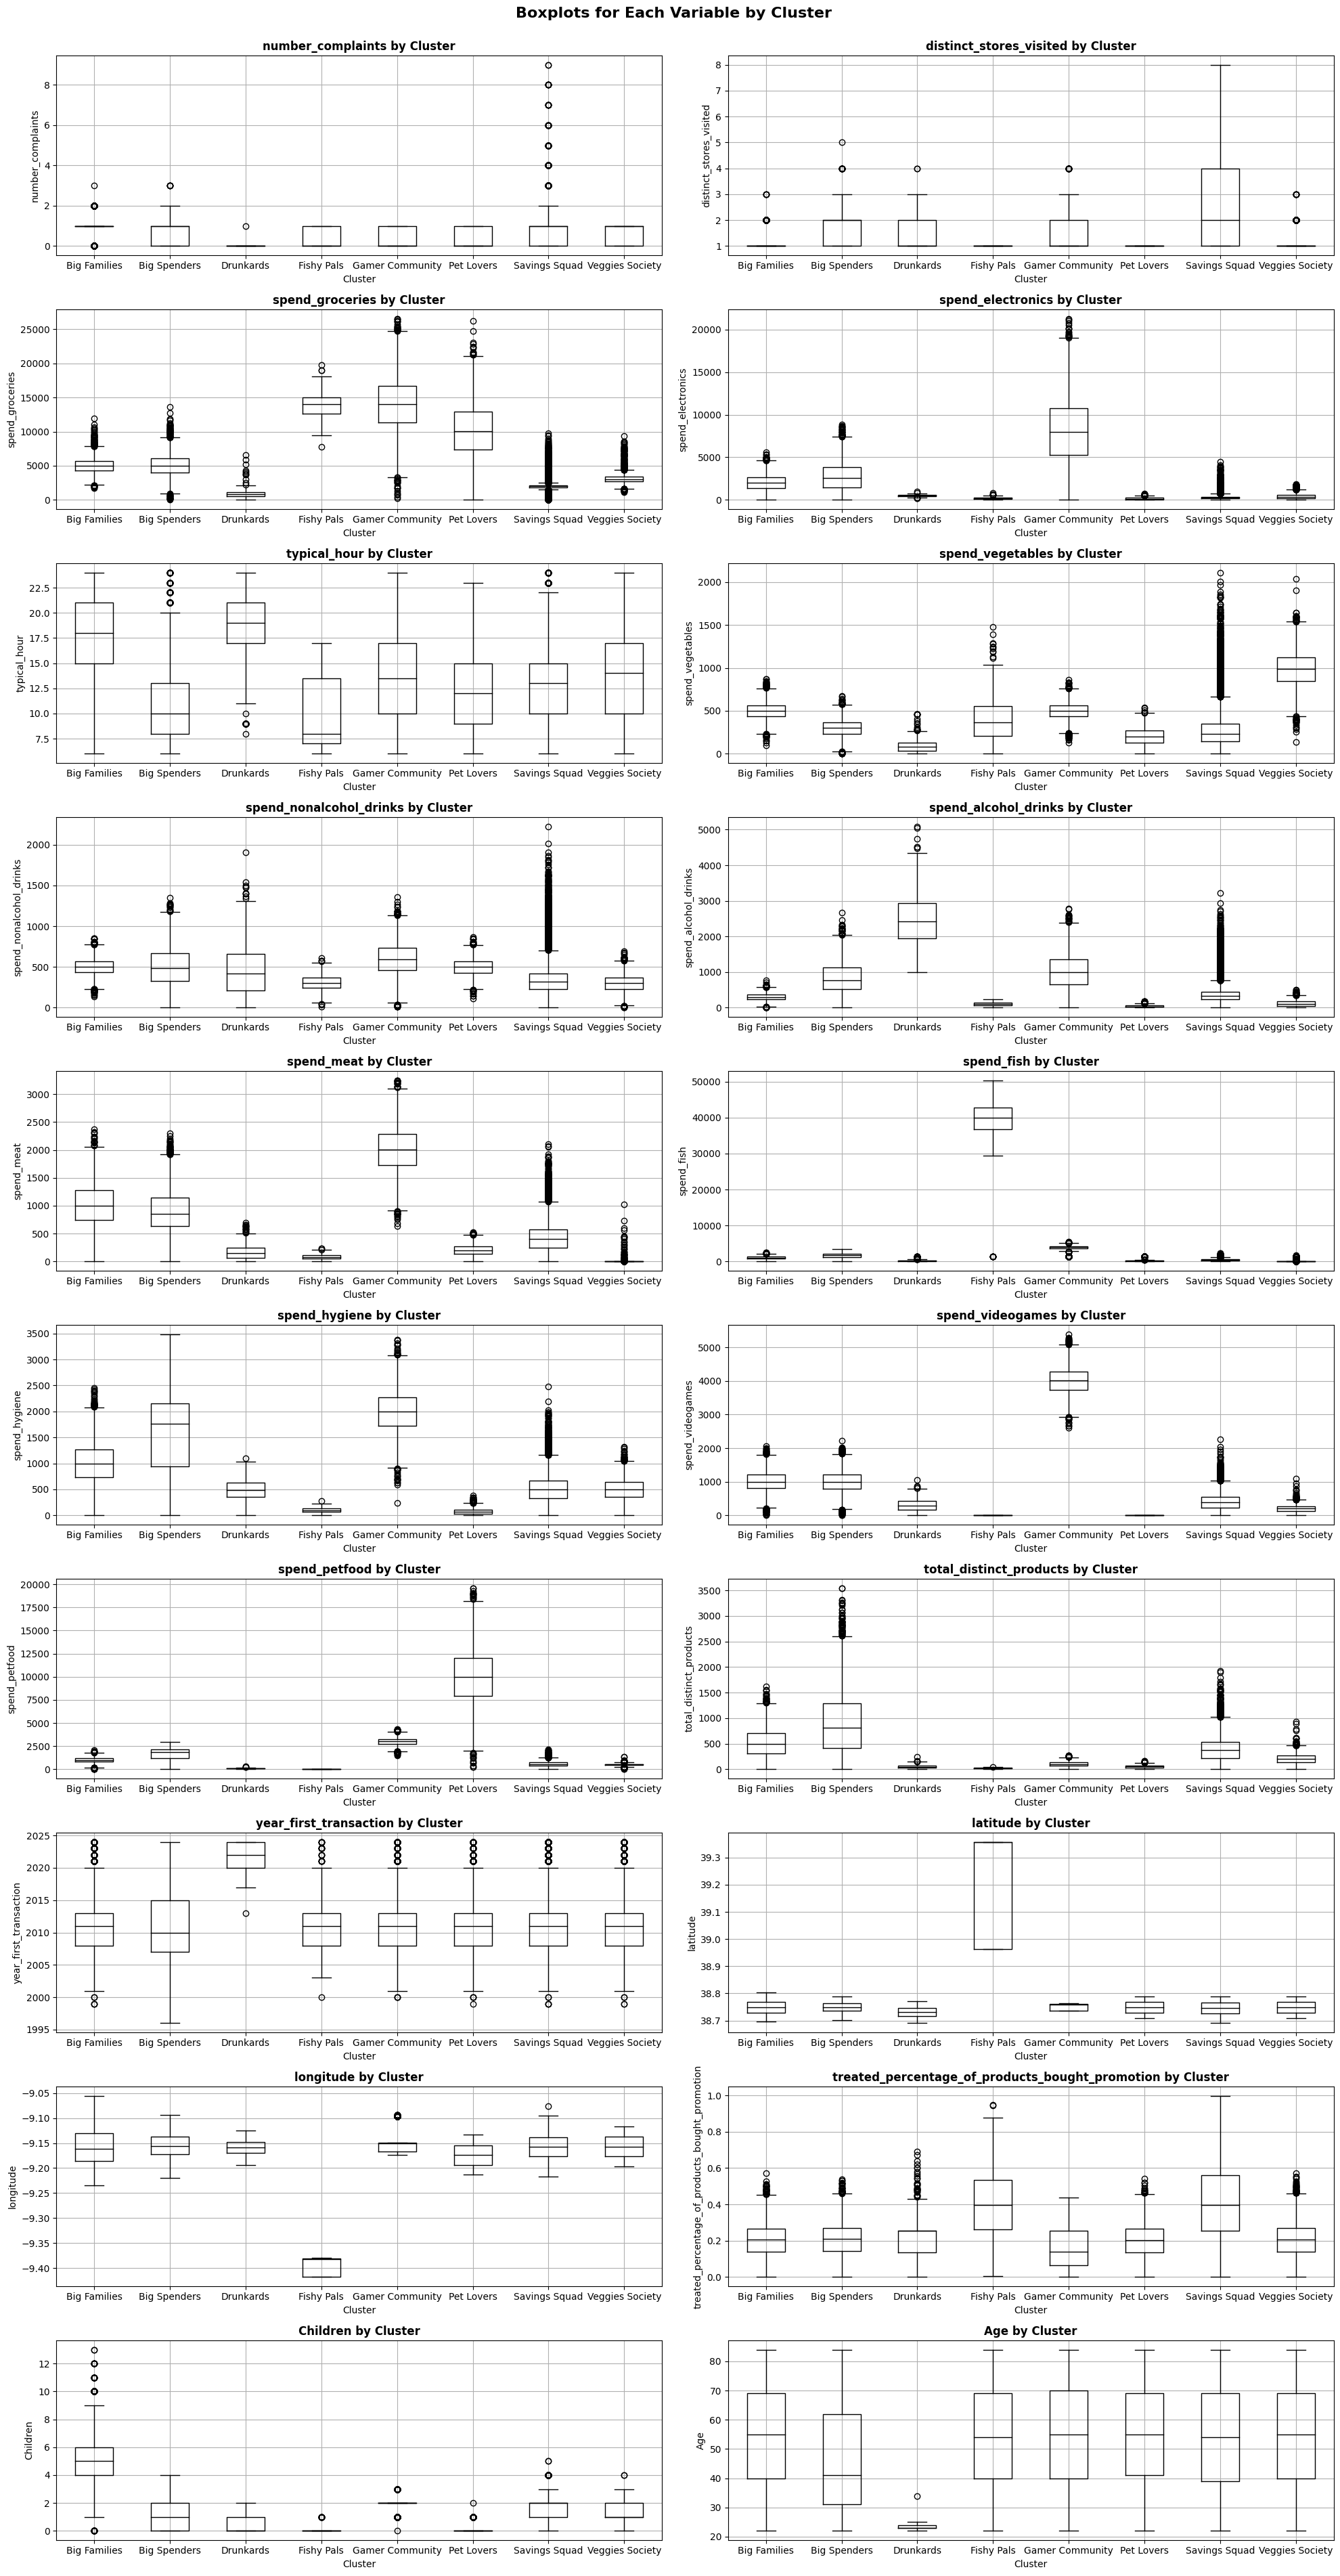

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

columns_to_analyse = ['number_complaints', 'distinct_stores_visited',
       'spend_groceries', 'spend_electronics', 'typical_hour',
       'spend_vegetables', 'spend_nonalcohol_drinks', 'spend_alcohol_drinks',
       'spend_meat', 'spend_fish', 'spend_hygiene', 'spend_videogames',
       'spend_petfood', 'total_distinct_products', 'year_first_transaction',
       'latitude', 'longitude',
       'treated_percentage_of_products_bought_promotion', 'Children', 'Age']


# Plotting
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(20, 40))
axes = axes.flatten()

for i, var in enumerate(columns_to_analyse):
    customers_with_clusters_.boxplot(column=var, by='cluster', ax=axes[i], color=dict(boxes='black', whiskers='black', medians='black', caps='black'))
    axes[i].set_title(f'{var} by Cluster', fontweight='bold')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(var)

# Adjust layout
plt.suptitle('Boxplots for Each Variable by Cluster', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()
